In [1]:
!pip install zarr
!pip install alphashape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.1/206.1 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 62.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=3035baf55d00734dcd9f0fd8680007316761e706f6b09d4ff3d1ca1b318e887e
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.6 MB/s eta 0:00:00


In [2]:
import networkx as nx
import scipy.spatial as sp
import zarr
import matplotlib.pyplot as plt
import numpy as np
import alphashape

In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

import os
os.chdir("/content/drive/My Drive/NASA/Fire Detection")
!ls -ltr

Mounted at /content/drive
total 12
drwx------ 2 root root 4096 Jun  6 00:50 'zzpd fire data'
drwx------ 2 root root 4096 Jun  9 01:01 'zzpd fire data 2'
drwx------ 2 root root 4096 Jul  6 01:45 'zzpd fire data 3'


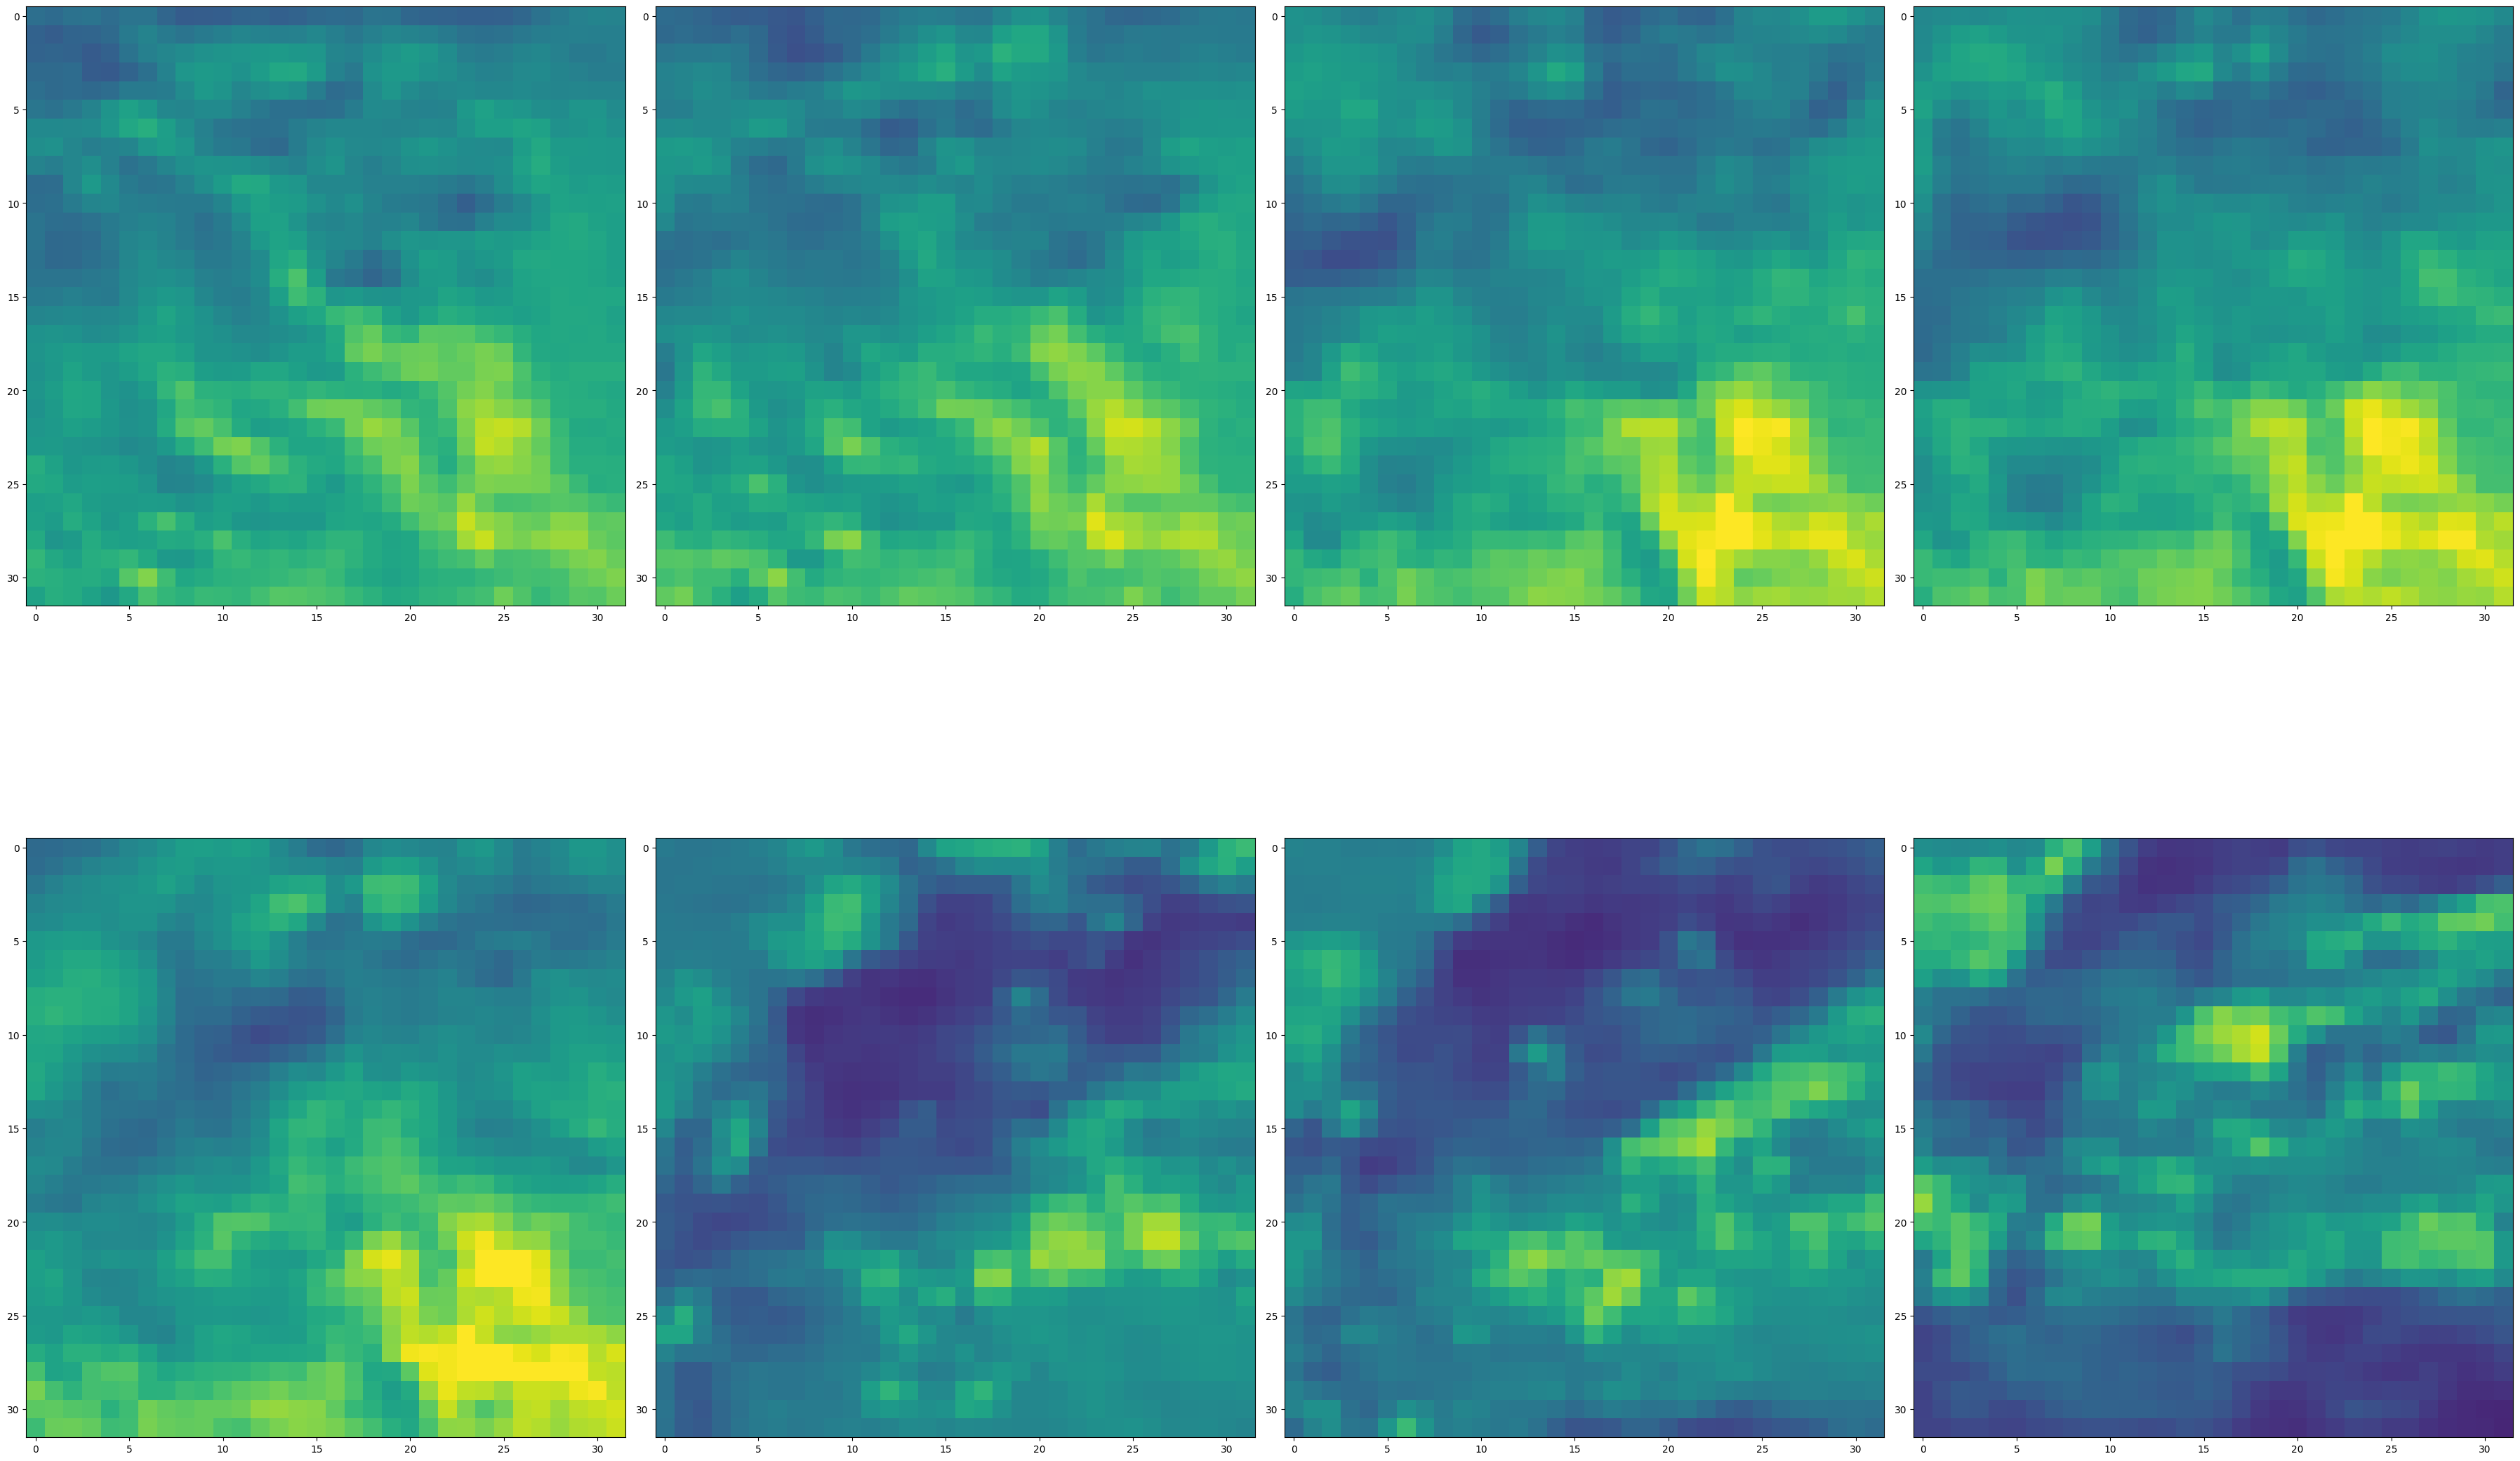

In [4]:
fname = 'zzpd fire data 2'
rawFileList = os.listdir(fname)

channel7List = []
channel7Name = []
timeSeriesDict = {}

rawFileList = sorted(rawFileList)

for name in rawFileList:
    channelData = np.array(zarr.open(fname + '//' + name)[:, :, 0]) # select channel 7
    timeSeriesDict[name] = channelData
    channel7List.append(channelData)
    channel7Name.append(name)

nrow = 2 # old data
ncol = 4

fig, axs = plt.subplots(nrow, ncol, figsize=(36, 27))

for i in range(nrow):
    for j in range(ncol):
        axs[i, j].imshow(channel7List[i* ncol + j], vmin=0, vmax=1) # vmin, vmax may change on different tiles
        #label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 6 + j], 'fire'].iloc[0]
        #axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()

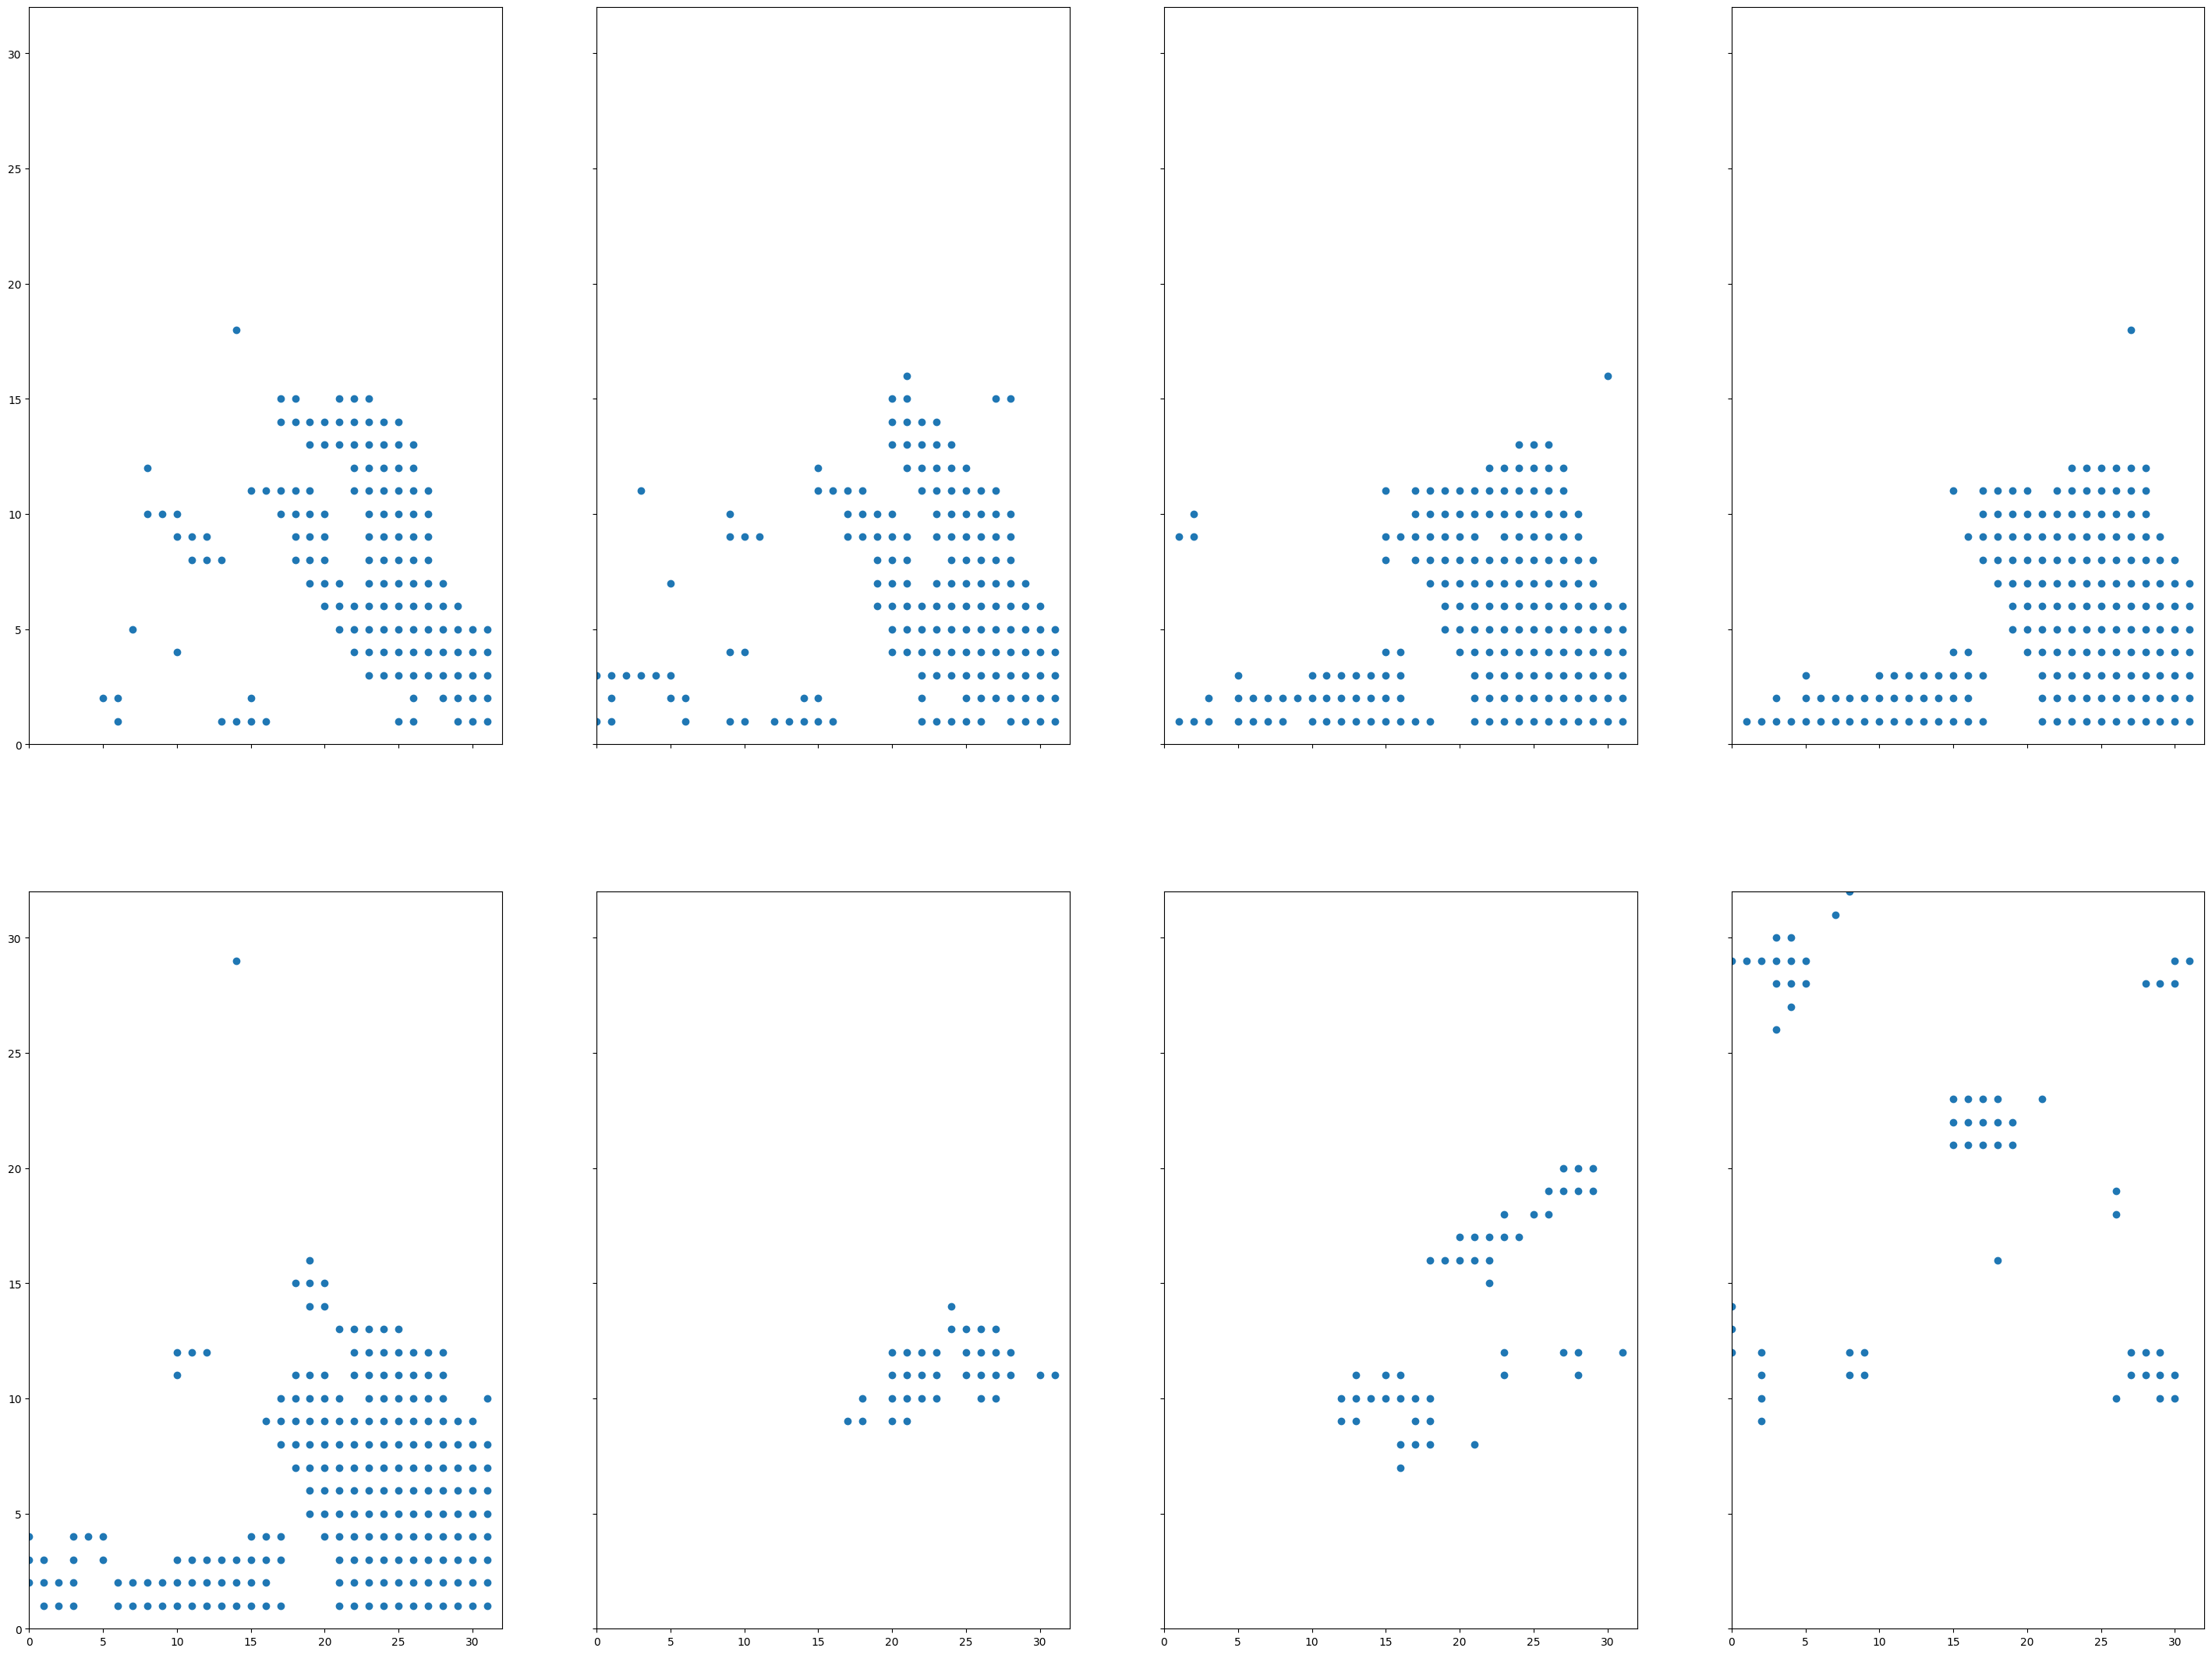

In [5]:
subLevel = 0.7

fig, ax = plt.subplots(nrow, ncol, sharex='col', sharey='row', figsize=(36, 27))
for i in range(0, nrow):
    for j in range(0, ncol):
        pointcloud = np.argwhere(np.array(channel7List[i*ncol + j]) > subLevel)
        x = pointcloud[:, 1]
        y = 32 - pointcloud[:, 0]
        ax[i, j].scatter(x, y)
        ax[i, j].set_xlim([0, 32])
        ax[i, j].set_ylim([0, 32])
plt.show()

In [6]:
testData = np.argwhere(np.array(channel7List[0]) > subLevel)
l = []
for i in list(testData):
    l.append(list(i))

print (l)

[[14, 14], [17, 17], [17, 18], [17, 21], [17, 22], [17, 23], [18, 17], [18, 18], [18, 19], [18, 20], [18, 21], [18, 22], [18, 23], [18, 24], [18, 25], [19, 19], [19, 20], [19, 21], [19, 22], [19, 23], [19, 24], [19, 25], [19, 26], [20, 8], [20, 22], [20, 23], [20, 24], [20, 25], [20, 26], [21, 15], [21, 16], [21, 17], [21, 18], [21, 19], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [22, 8], [22, 9], [22, 10], [22, 17], [22, 18], [22, 19], [22, 20], [22, 23], [22, 24], [22, 25], [22, 26], [22, 27], [23, 10], [23, 11], [23, 12], [23, 18], [23, 19], [23, 20], [23, 23], [23, 24], [23, 25], [23, 26], [23, 27], [24, 11], [24, 12], [24, 13], [24, 18], [24, 19], [24, 20], [24, 23], [24, 24], [24, 25], [24, 26], [24, 27], [25, 19], [25, 20], [25, 21], [25, 23], [25, 24], [25, 25], [25, 26], [25, 27], [25, 28], [26, 20], [26, 21], [26, 22], [26, 23], [26, 24], [26, 25], [26, 26], [26, 27], [26, 28], [26, 29], [27, 7], [27, 21], [27, 22], [27, 23], [27, 24], [27, 25], [27, 26], [27

In [18]:
from shapely.geometry import Polygon, mapping

In [19]:
nodelst = l
G = nx.Graph()
G.add_edges_from( sp.cKDTree(nodelst).query_pairs(r=1) )

groupList = []
for x in nx.connected_components(G):
    groupList.append(list(x))
    print (x)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56, 57, 58, 59, 60, 61, 62, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 128, 129, 130, 131, 132, 138, 139, 140, 141, 142}
{64, 65, 40, 41, 42, 52, 53, 54, 63}
{134, 135, 136, 137, 127}
{125, 126, 133}


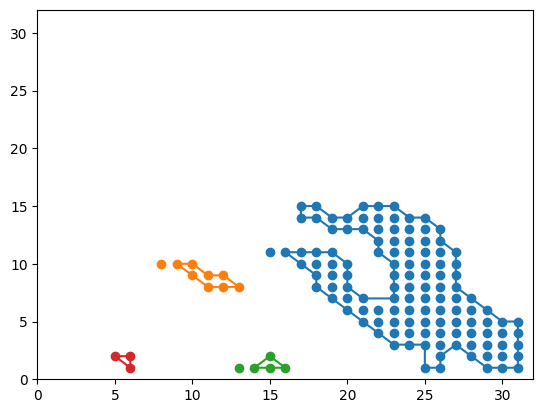

<Figure size 1500x1200 with 0 Axes>

In [24]:
regionDict = {}
for i in range(len(groupList)):
    regionDict['group{}'.format(i)] = np.array([nodelst[j] for j in groupList[i]])
    regionDict['group{}'.format(i)][:, 0] = 32 - regionDict['group{}'.format(i)][:, 0]

    alpha_shape = alphashape.alphashape(regionDict['group{}'.format(i)], 1) # set alpha = 1
    xx, yy = alpha_shape.exterior.coords.xy
    plt.plot(yy,xx)

    x = regionDict['group{}'.format(i)][:, 1]
    y = regionDict['group{}'.format(i)][:, 0]
    plt.scatter(x, y)

plt.xlim([0, 32])
plt.ylim([0, 32])
plt.figure(figsize=(15,12))
plt.show()

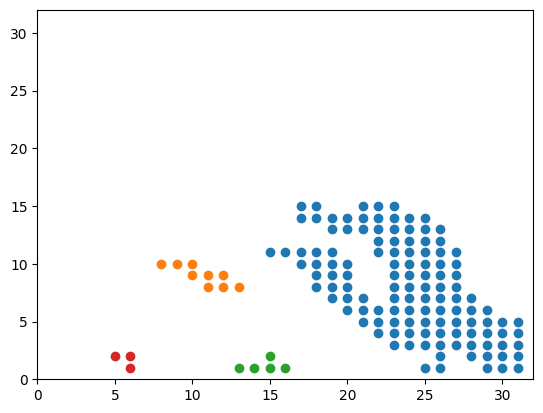

In [8]:
group1 = np.array([nodelst[i] for i in groupList[0]])
group2 = np.array([nodelst[i] for i in groupList[1]])
group3 = np.array([nodelst[i] for i in groupList[2]])
group4 = np.array([nodelst[i] for i in groupList[3]])

plt.xlim([0, 32])
plt.ylim([0, 32])

x1 = group1[:, 1]
y1 = 32 - group1[:, 0]

x2 = group2[:, 1]
y2 = 32 - group2[:, 0]

x3 = group3[:, 1]
y3 = 32 - group3[:, 0]

x4 = group4[:, 1]
y4 = 32 - group4[:, 0]

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)

plt.show()


In [11]:
alpha_shape = alphashape.alphashape(group1, 1.0) # for test
print (alpha_shape)

POLYGON ((17 23, 18 24, 18 25, 19 26, 20 26, 21 27, 22 27, 23 27, 24 27, 25 28, 26 29, 27 30, 27 31, 28 31, 29 31, 30 31, 31 31, 31 30, 31 29, 30 28, 30 26, 31 26, 31 25, 29 25, 29 24, 29 23, 28 22, 27 21, 26 20, 25 19, 24 18, 23 18, 22 17, 21 16, 21 17, 21 18, 21 19, 22 20, 23 20, 24 20, 25 21, 26 22, 25 23, 24 23, 23 23, 22 23, 21 22, 20 22, 19 21, 19 20, 19 19, 18 18, 18 17, 17 17, 17 18, 18 19, 18 20, 17 21, 17 22, 17 23))


In [ ]:
class IGraph:
    def __init__(self, nodelst=[], radius = 1):
        self.igraph = nx.Graph()
        self.radii  = radius
        self.nodelst = nodelst #nodelst is array of coordinate tuples, graph contains indices as nodes
        self.__make_edges__()

    def __make_edges__(self):
        self.igraph.add_edges_from( sp.cKDTree(self.nodelst).query_pairs(r=self.radii) )

    def get_conn_comp(self):
        ind = [list(x) for x in nx.connected_components(self.igraph) if len(x)>1]
        return [self.nodelst[indlist] for indlist in ind]


def graph_cluster(data, epsilon):
    graph = IGraph(nodelst = data, radius = epsilon)
    clusters = graph.get_conn_comp()
    return clusters, len(clusters)